In [1]:
import yfinance as yf
import pandas_datareader as pdr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense, Activation
import copy
    
df = pdr.DataReader('005390.KS','yahoo')

df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-11-08,1230.0,1200.0,1200.0,1220.0,303983.0,1220.0
2016-11-09,1220.0,1090.0,1215.0,1195.0,1383198.0,1195.0
2016-11-10,1250.0,1190.0,1195.0,1250.0,818667.0,1250.0
2016-11-11,1240.0,1205.0,1240.0,1205.0,566445.0,1205.0
2016-11-14,1230.0,1205.0,1210.0,1220.0,307788.0,1220.0
...,...,...,...,...,...,...
2021-11-01,3635.0,3430.0,3620.0,3560.0,1269536.0,3560.0
2021-11-02,3670.0,3525.0,3525.0,3610.0,648082.0,3610.0
2021-11-03,3625.0,3425.0,3610.0,3485.0,1152405.0,3485.0


In [2]:
def min_max_scaling(x):
    x_np = np.asarray(x)
    return (x_np - x_np.min()) / (x_np.max() - x_np.min() + 1e-7 )

def reverse_min_max_scaling(org_x, x):
    org_x_np = np.asarray(org_x) 
    x_np = np.asarray(x)
    return (x_np * (org_x_np.max() - org_x_np.min() + 1e-7)) + org_x_np.min()

In [3]:
data = df[-1200:]
data

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-12-07,1250.0,1205.0,1205.0,1250.0,839135.0,1250.0
2016-12-08,1250.0,1225.0,1230.0,1245.0,532013.0,1245.0
2016-12-09,1250.0,1225.0,1250.0,1240.0,429659.0,1240.0
2016-12-12,1270.0,1240.0,1240.0,1265.0,608123.0,1265.0
2016-12-13,1270.0,1245.0,1255.0,1265.0,341350.0,1265.0
...,...,...,...,...,...,...
2021-11-01,3635.0,3430.0,3620.0,3560.0,1269536.0,3560.0
2021-11-02,3670.0,3525.0,3525.0,3610.0,648082.0,3610.0
2021-11-03,3625.0,3425.0,3610.0,3485.0,1152405.0,3485.0


In [16]:
last_close_prices = data['Close'].values
a = float(last_close_prices[-1])
print(a)
print(type(a))

3500.0
<class 'float'>


In [12]:
import copy
high_prices = data['High'].values
low_prices = data['Low'].values
mid_prices = (high_prices + low_prices) / 2

#end_prices = data['Close'].values

seq_len = 50
sequence_length = seq_len + 1

result = []
for i in range(len(mid_prices) - sequence_length):
    result.append(mid_prices[i: i + sequence_length])

# for i in range(len(end_prices) - sequence_length):
#     result.append(end_prices[i: i + sequence_length])


# c = []
# value=1
# for i in end_prices[-50:]:
#     value = i
#     c.append(value)
# c.append(value)
# c = np.array(c)
# print(c)

# result.append(c)
# print(result[-1])

In [5]:
result = min_max_scaling(result)

In [6]:
result

array([[0.14975507, 0.15255423, 0.15255423, ..., 0.15955213, 0.15675297,
        0.15885234],
       [0.15255423, 0.15255423, 0.15745276, ..., 0.15675297, 0.15885234,
        0.16095171],
       [0.15255423, 0.15745276, 0.15815255, ..., 0.15885234, 0.16095171,
        0.16585024],
       ...,
       [0.83624913, 0.84114766, 0.84324703, ..., 0.81245626, 0.79496151,
        0.81315605],
       [0.84114766, 0.84324703, 0.79706088, ..., 0.79496151, 0.81315605,
        0.79286214],
       [0.84324703, 0.79706088, 0.7956613 , ..., 0.81315605, 0.79286214,
        0.78236529]])

In [7]:
result.shape

(1149, 51)

In [264]:
result[-1]

array([0.83848116, 0.82998016, 0.822896  , 0.80731085, 0.78889204,
       0.8625673 , 0.94332672, 0.97874752, 0.96599603, 0.94899405,
       0.9645792 , 0.93057523, 0.94899405, 0.90648909, 0.9291584 ,
       0.97733069, 0.97733069, 0.92065741, 0.89515443, 0.9334089 ,
       0.88523661, 0.95041088, 0.9688297 , 0.92349107, 0.86540096,
       0.85264948, 0.7959762 , 0.78180788, 0.7251346 , 0.78747521,
       0.7917257 , 0.77189005, 0.78180788, 0.78322471, 0.84273165,
       0.83848116, 0.81581184, 0.81156135, 0.85264948, 0.92207424,
       0.8937376 , 0.87106829, 0.88098612, 0.84839898, 0.83564749,
       0.82431284, 0.83848116, 0.80306036, 0.81156135, 0.80731085,
       0.80731085])

In [13]:
normalized_data = []
for i in result:
    normalized = [((float(p) / float(i[0])) - 1) for p in i]
    normalized_data.append(normalized)

In [14]:
result = np.array(normalized_data)
result

array([[ 0.        ,  0.00814664,  0.00814664, ...,  0.02851324,
         0.0203666 ,  0.02647658],
       [ 0.        ,  0.        ,  0.01414141, ...,  0.01212121,
         0.01818182,  0.02424242],
       [ 0.        ,  0.01414141,  0.01616162, ...,  0.01818182,
         0.02424242,  0.03838384],
       ...,
       [ 0.        ,  0.00475543,  0.00679348, ..., -0.02309783,
        -0.04008152, -0.02241848],
       [ 0.        ,  0.0020284 , -0.04259635, ..., -0.04462475,
        -0.0270453 , -0.04665314],
       [ 0.        , -0.04453441, -0.04588394, ..., -0.02901484,
        -0.048583  , -0.05870445]])

In [250]:
# print(len(result[0]))
# print(len(no[0]))

In [15]:
row = int(len(result) * 0.9)
train = result[:row, :]
np.random.shuffle(train)

train

array([[ 0.        ,  0.04198473,  0.07251908, ...,  0.26717557,
         0.23854962,  0.33015267],
       [ 0.        ,  0.0176    ,  0.04      , ...,  0.1616    ,
         0.1632    ,  0.1408    ],
       [ 0.        , -0.0165    , -0.0165    , ..., -0.009     ,
         0.004     ,  0.002     ],
       ...,
       [ 0.        , -0.00985222, -0.03546798, ..., -0.05763547,
        -0.05320197, -0.04975369],
       [ 0.        , -0.0112202 , -0.02524544, ..., -0.09957924,
        -0.11079944, -0.10378682],
       [ 0.        , -0.0027533 ,  0.01321586, ...,  0.04955947,
         0.07268722,  0.09746696]])

In [16]:
x_train = train[:, :-1]
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
y_train = train[:, -1]

x_test = result[row:, :-1]
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
y_test = result[row:, -1]

Epoch 1/20
104/104 [==============================] - 5s 25ms/step - loss: 0.0135 - val_loss: 0.0196
Epoch 2/20
104/104 [==============================] - 2s 20ms/step - loss: 0.0081 - val_loss: 0.0110
Epoch 3/20
104/104 [==============================] - 2s 20ms/step - loss: 0.0050 - val_loss: 0.0332
Epoch 4/20
104/104 [==============================] - 2s 20ms/step - loss: 0.0062 - val_loss: 0.0090
Epoch 5/20
104/104 [==============================] - 2s 20ms/step - loss: 0.0034 - val_loss: 0.0087
Epoch 6/20
104/104 [==============================] - 2s 20ms/step - loss: 0.0033 - val_loss: 0.0070
Epoch 7/20
104/104 [==============================] - 2s 20ms/step - loss: 0.0033 - val_loss: 0.0106
Epoch 8/20
104/104 [==============================] - 2s 21ms/step - loss: 0.0033 - val_loss: 0.0057
Epoch 9/20
104/104 [==============================] - 2s 21ms/step - loss: 0.0033 - val_loss: 0.0070
Epoch 10/20
104/104 [==============================] - 2s 20ms/step - loss: 0.0031 - val_lo

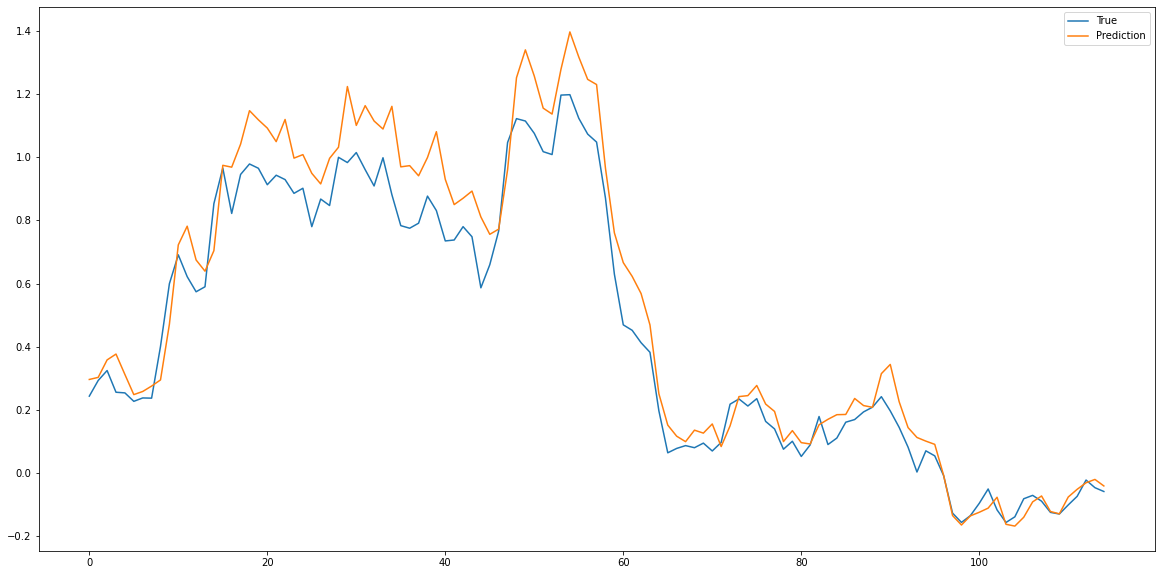

In [17]:
model = Sequential()

model.add(LSTM(50, return_sequences=True, input_shape=(50, 1)))

model.add(LSTM(64, return_sequences=False))

model.add(Dense(1, activation='linear'))

model.compile(loss='mse', optimizer='rmsprop')

model.fit(x_train, y_train,
    validation_data=(x_test, y_test),
    batch_size=10,
    epochs=20)

pred = model.predict(x_test)

fig = plt.figure(facecolor='white', figsize=(20, 10))
ax = fig.add_subplot(111)
ax.plot(y_test, label='True')
ax.plot(pred, label='Prediction')
ax.legend()
plt.show()

In [254]:
len(pred)

115

In [255]:
reverse_pre = reverse_min_max_scaling(end_prices,pred)

In [256]:
reverse_pre

array([[1817.7207],
       [1878.6421],
       [1937.8156],
       [1871.7015],
       [1883.9615],
       [1879.27  ],
       [1969.5535],
       [1993.9369],
       [1955.8224],
       [2322.4136],
       [2563.5776],
       [2523.7798],
       [2440.046 ],
       [2490.42  ],
       [2591.9756],
       [3084.6682],
       [3040.514 ],
       [2944.2473],
       [3060.8088],
       [2888.2483],
       [3114.5596],
       [2919.895 ],
       [3007.0205],
       [2938.946 ],
       [3155.1255],
       [3005.6235],
       [3049.8308],
       [3373.9832],
       [3241.8528],
       [3169.3171],
       [3411.5176],
       [3385.3972],
       [3247.5493],
       [3269.5073],
       [3287.1213],
       [3111.231 ],
       [3110.7485],
       [3064.6914],
       [3002.141 ],
       [3093.321 ],
       [2947.7952],
       [2917.434 ],
       [3034.026 ],
       [3104.589 ],
       [2926.1292],
       [2887.1958],
       [3064.406 ],
       [3415.238 ],
       [3735.1973],
       [3633.9116],


In [257]:
len(reverse_pre)

115

In [267]:
x_test.shape

(115, 50, 1)

In [268]:
x_train.shape

(1035, 50, 1)

In [18]:
score = model.evaluate(x_test,y_test,batch_size=30)
print(score)

4/4 [==============================] - 0s 7ms/step - loss: 0.0126
0.01255610678344965


In [39]:
# x = data[-50:]

In [166]:
# high_prices1 = x['High'].values
# low_prices1 = x['Low'].values
# mid_prices1 = (high_prices + low_prices) / 2


# result = []
# result.append(mid_prices1)

# print(result)


In [167]:
# print(result[0])
# x = result[0]

In [62]:
# pre = model.predict(x_test)

In [63]:
# type(x_test[0])

numpy.ndarray

In [64]:
# type(x_test)

numpy.ndarray

In [66]:
# x_test.shape

(115, 50, 1)

In [67]:
# x_test[0].shape

(50, 1)

In [168]:
# a = np.array([x_test[0]])
# a

In [73]:
# p = model.predict(a)

In [74]:
# p

array([[0.2500855]], dtype=float32)

In [93]:
data

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-12-07,1250.0,1205.0,1205.0,1250.0,839135.0,1250.0
2016-12-08,1250.0,1225.0,1230.0,1245.0,532013.0,1245.0
2016-12-09,1250.0,1225.0,1250.0,1240.0,429659.0,1240.0
2016-12-12,1270.0,1240.0,1240.0,1265.0,608123.0,1265.0
2016-12-13,1270.0,1245.0,1255.0,1265.0,341350.0,1265.0
...,...,...,...,...,...,...
2021-11-01,3635.0,3430.0,3620.0,3560.0,1269536.0,3560.0
2021-11-02,3670.0,3525.0,3525.0,3610.0,648082.0,3610.0
2021-11-03,3625.0,3425.0,3610.0,3485.0,1152405.0,3485.0


In [192]:
df = data[-52:-2]

high_prices = df['High'].values
low_prices = df['Low'].values
mid_prices = (high_prices + low_prices) / 2

end_prices = df['Close'].values

print(end_prices)

[3590. 3450. 3610. 3580. 3555. 3500. 3435. 3695. 3980. 4105. 4060. 4000.
 4055. 3935. 4000. 3850. 3930. 4100. 4100. 3900. 3810. 3945. 3775. 4005.
 4070. 3910. 3705. 3660. 3460. 3410. 3210. 3430. 3445. 3375. 3410. 3415.
 3625. 3610. 3530. 3515. 3660. 3905. 3805. 3725. 3760. 3645. 3600. 3560.
 3610. 3485.]


In [185]:
end_prices = min_max_scaling(end_prices)
end_prices

array([0.42458101, 0.26815642, 0.44692737, 0.41340782, 0.38547486,
       0.32402235, 0.25139665, 0.54189944, 0.8603352 , 1.        ,
       0.94972067, 0.88268156, 0.94413408, 0.81005587, 0.88268156,
       0.7150838 , 0.80446927, 0.99441341, 0.99441341, 0.77094972,
       0.67039106, 0.82122905, 0.63128492, 0.88826816, 0.96089385,
       0.7821229 , 0.55307263, 0.5027933 , 0.27932961, 0.22346369,
       0.        , 0.24581006, 0.26256983, 0.18435754, 0.22346369,
       0.22905028, 0.46368715, 0.44692737, 0.3575419 , 0.34078212,
       0.5027933 , 0.77653631, 0.66480447, 0.57541899, 0.61452514,
       0.48603352, 0.43575419, 0.39106145, 0.44692737, 0.30726257])

In [193]:
r = []
for i in end_prices:
    r.append([i])
print(r)

[[3590.0], [3450.0], [3610.0], [3580.0], [3555.0], [3500.0], [3435.0], [3695.0], [3980.0], [4105.0], [4060.0], [4000.0], [4055.0], [3935.0], [4000.0], [3850.0], [3930.0], [4100.0], [4100.0], [3900.0], [3810.0], [3945.0], [3775.0], [4005.0], [4070.0], [3910.0], [3705.0], [3660.0], [3460.0], [3410.0], [3210.0], [3430.0], [3445.0], [3375.0], [3410.0], [3415.0], [3625.0], [3610.0], [3530.0], [3515.0], [3660.0], [3905.0], [3805.0], [3725.0], [3760.0], [3645.0], [3600.0], [3560.0], [3610.0], [3485.0]]


In [194]:
b = np.array([r])
b

array([[[3590.],
        [3450.],
        [3610.],
        [3580.],
        [3555.],
        [3500.],
        [3435.],
        [3695.],
        [3980.],
        [4105.],
        [4060.],
        [4000.],
        [4055.],
        [3935.],
        [4000.],
        [3850.],
        [3930.],
        [4100.],
        [4100.],
        [3900.],
        [3810.],
        [3945.],
        [3775.],
        [4005.],
        [4070.],
        [3910.],
        [3705.],
        [3660.],
        [3460.],
        [3410.],
        [3210.],
        [3430.],
        [3445.],
        [3375.],
        [3410.],
        [3415.],
        [3625.],
        [3610.],
        [3530.],
        [3515.],
        [3660.],
        [3905.],
        [3805.],
        [3725.],
        [3760.],
        [3645.],
        [3600.],
        [3560.],
        [3610.],
        [3485.]]])

In [195]:
p = model.predict(b)

In [196]:
print(p)

[[4.3521676]]


In [197]:
re = reverse_min_max_scaling(end_prices,p)

In [198]:
re

array([[7105.19]], dtype=float32)

In [200]:
df = data[-60:-2]
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-08-06,4265.0,4050.0,4210.0,4080.0,1989256.0,4080.0
2021-08-09,4270.0,4015.0,4080.0,4180.0,2565193.0,4180.0
2021-08-10,4480.0,4050.0,4155.0,4150.0,4776585.0,4150.0
2021-08-11,4450.0,4050.0,4180.0,4070.0,5277553.0,4070.0
2021-08-12,4160.0,3840.0,4125.0,3905.0,3099217.0,3905.0
2021-08-13,3895.0,3735.0,3895.0,3850.0,2110248.0,3850.0
2021-08-17,3815.0,3545.0,3745.0,3575.0,2065995.0,3575.0
2021-08-18,3835.0,3560.0,3605.0,3835.0,2199706.0,3835.0
2021-08-19,3845.0,3565.0,3770.0,3590.0,2180406.0,3590.0


In [118]:
r = []
for i in end_prices:
    r.append([i/mid_prices[0]-1])
print(r)

[[0.0], [-0.04453441295546556], [-0.045883940620782715], [-0.026990553306342813], [-0.04385964912280704], [-0.03913630229419707], [-0.0775978407557355], [-0.036437246963562764], [0.056005398110661186], [0.08704453441295557], [0.09514170040485825], [0.10121457489878538], [0.08636977058029682], [0.0695006747638327], [0.0695006747638327], [0.06477732793522262], [0.044534412955465674], [0.06612685560053988], [0.12078272604588403], [0.07017543859649122], [0.036437246963562764], [0.05195681511470984], [0.03508771929824572], [0.05735492577597845], [0.09581646423751677], [0.08164642375168696], [0.010121457489878471], [-0.01619433198380571], [-0.03576248313090413], [-0.10188933873144401], [-0.09379217273954121], [-0.09446693657219973], [-0.07827260458839402], [-0.07422402159244268], [-0.07354925775978405], [-0.07692307692307687], [-0.04925775978407554], [0.009446693657219951], [-0.04251012145748989], [-0.04251012145748989], [-0.021592442645074206], [0.03171390013495268], [0.04251012145748989], 

In [120]:
b = np.array([r])
b

array([[[ 0.        ],
        [-0.04453441],
        [-0.04588394],
        [-0.02699055],
        [-0.04385965],
        [-0.0391363 ],
        [-0.07759784],
        [-0.03643725],
        [ 0.0560054 ],
        [ 0.08704453],
        [ 0.0951417 ],
        [ 0.10121457],
        [ 0.08636977],
        [ 0.06950067],
        [ 0.06950067],
        [ 0.06477733],
        [ 0.04453441],
        [ 0.06612686],
        [ 0.12078273],
        [ 0.07017544],
        [ 0.03643725],
        [ 0.05195682],
        [ 0.03508772],
        [ 0.05735493],
        [ 0.09581646],
        [ 0.08164642],
        [ 0.01012146],
        [-0.01619433],
        [-0.03576248],
        [-0.10188934],
        [-0.09379217],
        [-0.09446694],
        [-0.0782726 ],
        [-0.07422402],
        [-0.07354926],
        [-0.07692308],
        [-0.04925776],
        [ 0.00944669],
        [-0.04251012],
        [-0.04251012],
        [-0.02159244],
        [ 0.0317139 ],
        [ 0.04251012],
        [ 0

In [121]:
p = model.predict(b)

In [122]:
print(p)

[[-0.03523507]]


In [153]:
high_prices = data['High'].values
low_prices = data['Low'].values
mid_prices = (high_prices + low_prices) / 2

seq_len = 50
sequence_length = seq_len + 1

result = []
for i in range(len(mid_prices) - sequence_length):
    result.append(mid_prices[i: i + sequence_length])
result

[array([1227.5, 1237.5, 1237.5, 1255. , 1257.5, 1257.5, 1245. , 1240. ,
        1237.5, 1250. , 1240. , 1237.5, 1230. , 1217.5, 1210. , 1210. ,
        1230. , 1277.5, 1297.5, 1295. , 1315. , 1325. , 1292.5, 1290. ,
        1302.5, 1292.5, 1282.5, 1292.5, 1272.5, 1277.5, 1262.5, 1265. ,
        1262.5, 1240. , 1230. , 1230. , 1222.5, 1250. , 1245. , 1232.5,
        1250. , 1265. , 1257.5, 1255. , 1260. , 1257.5, 1272.5, 1267.5,
        1262.5, 1252.5, 1260. ]),
 array([1237.5, 1237.5, 1255. , 1257.5, 1257.5, 1245. , 1240. , 1237.5,
        1250. , 1240. , 1237.5, 1230. , 1217.5, 1210. , 1210. , 1230. ,
        1277.5, 1297.5, 1295. , 1315. , 1325. , 1292.5, 1290. , 1302.5,
        1292.5, 1282.5, 1292.5, 1272.5, 1277.5, 1262.5, 1265. , 1262.5,
        1240. , 1230. , 1230. , 1222.5, 1250. , 1245. , 1232.5, 1250. ,
        1265. , 1257.5, 1255. , 1260. , 1257.5, 1272.5, 1267.5, 1262.5,
        1252.5, 1260. , 1267.5]),
 array([1237.5, 1255. , 1257.5, 1257.5, 1245. , 1240. , 1237.5, 1250